# same as convnet1, but with a smaller lr

In [1]:
# As usual, a bit of setup

import numpy as np
import matplotlib.pyplot as plt
from deeplearning.classifiers.cnn import *
from deeplearning.data_utils import get_CIFAR10_data
from deeplearning.gradient_check import eval_numerical_gradient_array, eval_numerical_gradient
from deeplearning.layers import *
from deeplearning.fast_layers import *
from deeplearning.solver import Solver

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

def rel_error(x, y):
  """ returns relative error """
  return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

In [2]:
# Load the (preprocessed) CIFAR10 data.

data = get_CIFAR10_data()

In [3]:
# Train a really good model on CIFAR-10
from deeplearning.classifiers.convnet4 import *
model = HaoConvNet4(weight_scale=0.006, hidden_dim=512, reg=0.001, dropout=0.5)

solver = Solver(model, data,
                num_epochs= 15, batch_size=128,
                update_rule='adam',
                optim_config={
                  'learning_rate': 1e-4,
                },
                verbose=True, print_every=10)
solver.train()

(Iteration 1 / 5730) loss: 2.307999
(Epoch 0 / 15) train acc: 0.170000; val_acc: 0.169000
(Iteration 11 / 5730) loss: 2.085438
(Iteration 21 / 5730) loss: 1.807823
(Iteration 31 / 5730) loss: 1.806938
(Iteration 41 / 5730) loss: 1.686152
(Iteration 51 / 5730) loss: 1.712151
(Iteration 61 / 5730) loss: 1.688914
(Iteration 71 / 5730) loss: 1.547380
(Iteration 81 / 5730) loss: 1.542602
(Iteration 91 / 5730) loss: 1.490993
(Iteration 101 / 5730) loss: 1.523793
(Iteration 111 / 5730) loss: 1.416769
(Iteration 121 / 5730) loss: 1.662809
(Iteration 131 / 5730) loss: 1.453565
(Iteration 141 / 5730) loss: 1.467942
(Iteration 151 / 5730) loss: 1.240489
(Iteration 161 / 5730) loss: 1.308542
(Iteration 171 / 5730) loss: 1.319791
(Iteration 181 / 5730) loss: 1.268557
(Iteration 191 / 5730) loss: 1.200170
(Iteration 201 / 5730) loss: 1.405810
(Iteration 211 / 5730) loss: 1.429148
(Iteration 221 / 5730) loss: 1.162831
(Iteration 231 / 5730) loss: 1.312646
(Iteration 241 / 5730) loss: 1.208201
(Iterat

(Iteration 2001 / 5730) loss: 0.673648
(Iteration 2011 / 5730) loss: 0.603147
(Iteration 2021 / 5730) loss: 0.709332
(Iteration 2031 / 5730) loss: 0.730187
(Iteration 2041 / 5730) loss: 0.701738
(Iteration 2051 / 5730) loss: 0.749651
(Iteration 2061 / 5730) loss: 0.802053
(Iteration 2071 / 5730) loss: 0.719266
(Iteration 2081 / 5730) loss: 0.761753
(Iteration 2091 / 5730) loss: 0.658942
(Iteration 2101 / 5730) loss: 0.723907
(Iteration 2111 / 5730) loss: 0.857587
(Iteration 2121 / 5730) loss: 0.759313
(Iteration 2131 / 5730) loss: 0.703785
(Iteration 2141 / 5730) loss: 0.658201
(Iteration 2151 / 5730) loss: 0.781341
(Iteration 2161 / 5730) loss: 0.744332
(Iteration 2171 / 5730) loss: 0.579657
(Iteration 2181 / 5730) loss: 0.785695
(Iteration 2191 / 5730) loss: 0.582119
(Iteration 2201 / 5730) loss: 0.731323
(Iteration 2211 / 5730) loss: 0.693904
(Iteration 2221 / 5730) loss: 0.695542
(Iteration 2231 / 5730) loss: 0.793221
(Iteration 2241 / 5730) loss: 0.690658
(Iteration 2251 / 5730) l

(Iteration 3981 / 5730) loss: 0.601523
(Iteration 3991 / 5730) loss: 0.589869
(Iteration 4001 / 5730) loss: 0.617185
(Iteration 4011 / 5730) loss: 0.497823
(Iteration 4021 / 5730) loss: 0.557869
(Iteration 4031 / 5730) loss: 0.610230
(Iteration 4041 / 5730) loss: 0.569872
(Iteration 4051 / 5730) loss: 0.602280
(Iteration 4061 / 5730) loss: 0.651589
(Iteration 4071 / 5730) loss: 0.645558
(Iteration 4081 / 5730) loss: 0.649940
(Iteration 4091 / 5730) loss: 0.615060
(Iteration 4101 / 5730) loss: 0.570278
(Iteration 4111 / 5730) loss: 0.556343
(Iteration 4121 / 5730) loss: 0.507502
(Iteration 4131 / 5730) loss: 0.707612
(Iteration 4141 / 5730) loss: 0.613914
(Iteration 4151 / 5730) loss: 0.616298
(Iteration 4161 / 5730) loss: 0.564094
(Iteration 4171 / 5730) loss: 0.670919
(Iteration 4181 / 5730) loss: 0.626800
(Iteration 4191 / 5730) loss: 0.682300
(Iteration 4201 / 5730) loss: 0.564029
Time elapsed (hh:mm:ss.ms) 3:58:22.884187
(Epoch 11 / 15) train acc: 0.807000; val_acc: 0.743000
(Itera

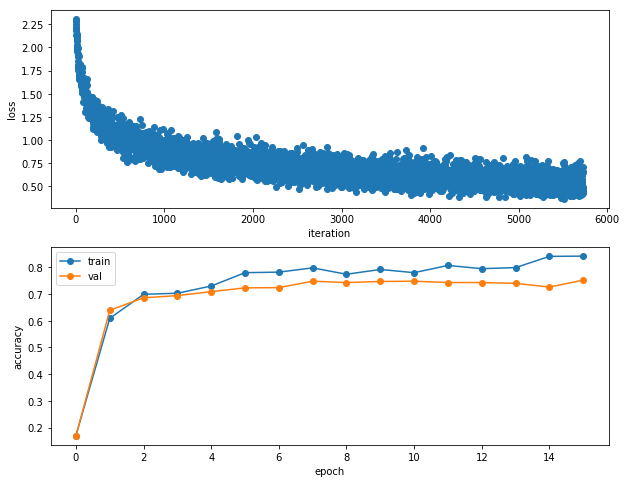

In [4]:
plt.subplot(2, 1, 1)
plt.plot(solver.loss_history, 'o')
plt.xlabel('iteration')
plt.ylabel('loss')

plt.subplot(2, 1, 2)
plt.plot(solver.train_acc_history, '-o')
plt.plot(solver.val_acc_history, '-o')
plt.legend(['train', 'val'], loc='upper left')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

In [5]:
test_acc = solver.check_accuracy(data['X_test'], data['y_test'])
print 'test acc: %f' % (test_acc)

test acc: 0.756000


In [6]:
import pickle
with open('result_convnet4_1', 'wb') as f:
    pickle.dump([solver.loss_history, solver.train_acc_history,solver.val_acc_history], f)